In [2]:
from librerias import *

In [3]:
btc_dia = pd.read_csv ('Data/btc_dia.csv')
#btc_sem = pd.read_csv ('Data/btc_sem.csv')
#btc_mes = pd.read_csv ('Data/btc_mes.csv')
#btc_ano = pd.read_csv ('Data/btc_ano.csv')

btc_dia.set_index('Date', inplace=True)

btc_dia.index = pd.to_datetime(btc_dia.index)

btc_dia = btc_dia.loc['2014-01-01':]

In [4]:
btc_dia.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3730 entries, 2024-03-18 to 2014-01-01
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    3730 non-null   int64  
 1   Open     3730 non-null   int64  
 2   High     3730 non-null   int64  
 3   Low      3730 non-null   int64  
 4   Vol_BTC  3730 non-null   float64
 5   Vol_USD  3730 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 204.0+ KB


In [5]:
btc_dia.tail (15)

,Price,Open,High,Low,Vol_BTC,Vol_USD
Date,,,,,,
2014-01-15,941,919,973,915,6830.0,"6,427,030"
2014-01-14,919,922,942,904,4310.0,"3,960,890"
2014-01-13,922,939,949,879,10130.0,"9,339,860"
2014-01-12,939,1005,1022,922,9930.0,"9,324,270"
2014-01-11,1005,957,1010,935,11180.0,"11,235,900"
2014-01-10,957,937,964,905,6350.0,"6,076,950"
2014-01-09,937,938,964,866,14420.0,"13,511,540"
2014-01-08,938,879,966,858,14100.0,"13,225,800"
2014-01-07,879,1012,1044,879,22670.0,"19,926,930"


In [6]:
btc_ano = btc_dia.resample('YE').last()

btc_ano ['retornos']= btc_ano ['Open'].pct_change ().round (3)


btc_ano['Vol_BTC_sum'] = [btc_dia[btc_dia.index.year == year]['Vol_BTC'].sum() for year in btc_ano.index.year]
btc_ano['Vol_USD_sum'] = [btc_dia[btc_dia.index.year == year]['Vol_USD'].sum() for year in btc_ano.index.year]

btc_ano.drop(columns=['Vol_BTC'], inplace=True)
btc_ano.drop(columns=['Vol_USD'], inplace=True)

btc_ano.drop(columns=['Vol_USD_sum'], inplace=True)
btc_ano.drop(columns=['retornos'], inplace=True)

btc_ano

,Price,Open,High,Low,Vol_BTC_sum
Date,,,,,
2014-12-31,318,311,319,308,4412190.0
2015-12-31,430,427,433,417,27580980.0
2016-12-31,963,959,965,942,19602750.0
2017-12-31,13850,12532,14241,12359,37438920.0
2018-12-31,3709,3815,3819,3658,75165960.0
2019-12-31,7196,7261,7331,7167,186913690.0
2020-12-31,28949,28866,29298,28025,118268850.0
2021-12-31,46219,47123,48553,45693,37774440.0
2022-12-31,16537,16607,16635,16487,80494780.0


In [7]:
btc_primer_dia_por_año = btc_dia.resample('YE').first()

btc_primer_dia_por_año


,Price,Open,High,Low,Vol_BTC,Vol_USD
Date,,,,,,
2014-12-31,815,805,829,771,10760.0,"8,769,400"
2015-12-31,314,318,321,313,12820.0,"4,025,480"
2016-12-31,434,430,438,425,46970.0,"20,384,980"
2017-12-31,995,963,1001,956,41150.0,"40,944,250"
2018-12-31,13444,13850,13921,12877,78430.0,"1,054,412,920"
2019-12-31,3809,3709,3814,3664,469110.0,"1,786,839,990"
2020-12-31,7199,7196,7259,7180,420280.0,"3,025,595,720"
2021-12-31,29359,28951,29627,28712,100900.0,"2,962,323,100"
2022-12-31,47738,46217,47917,46217,31240.0,"1,491,335,120"


In [8]:
columna_open_primer_dia = btc_primer_dia_por_año['Open']
print(columna_open_primer_dia)


Date
2014-12-31      805
2015-12-31      318
2016-12-31      430
2017-12-31      963
2018-12-31    13850
2019-12-31     3709
2020-12-31     7196
2021-12-31    28951
2022-12-31    46217
2023-12-31    16537
2024-12-31    42272
Freq: YE-DEC, Name: Open, dtype: int64


In [9]:
# Agrupar por año y calcular el máximo de la columna 'High' y el mínimo de la columna 'Low'
max_high_por_año = btc_dia['High'].resample('YE').max()
min_low_por_año = btc_dia['Low'].resample('YE').min()

# Imprimir los resultados
print("Máximo High por año:")
print(max_high_por_año)
print("\nMínimo Low por año:")
print(min_low_por_año)




Máximo High por año:
Date
2014-12-31     1093
2015-12-31      492
2016-12-31      982
2017-12-31    19870
2018-12-31    17252
2019-12-31    13929
2020-12-31    29298
2021-12-31    68990
2022-12-31    48199
2023-12-31    44697
2024-12-31    73740
Freq: YE-DEC, Name: High, dtype: int64

Mínimo Low por año:
Date
2014-12-31       91
2015-12-31      157
2016-12-31      350
2017-12-31      739
2018-12-31     3177
2019-12-31     3368
2020-12-31     3869
2021-12-31    28204
2022-12-31    15504
2023-12-31    16499
2024-12-31    38546
Freq: YE-DEC, Name: Low, dtype: int64


In [10]:
btc_ano.update(max_high_por_año.rename('High'))
btc_ano.update(min_low_por_año.rename('Low'))
btc_ano.update(columna_open_primer_dia.rename('Open'))
btc_ano.rename(columns={'Price': 'Cierre'}, inplace=True)
btc_ano.rename(columns={'High': 'Max'}, inplace=True)
btc_ano.rename(columns={'Open': 'Apertura'}, inplace=True)
btc_ano

,Cierre,Apertura,Max,Low,Vol_BTC_sum
Date,,,,,
2014-12-31,318,805,1093,91,4412190.0
2015-12-31,430,318,492,157,27580980.0
2016-12-31,963,430,982,350,19602750.0
2017-12-31,13850,963,19870,739,37438920.0
2018-12-31,3709,13850,17252,3177,75165960.0
2019-12-31,7196,3709,13929,3368,186913690.0
2020-12-31,28949,7196,29298,3869,118268850.0
2021-12-31,46219,28951,68990,28204,37774440.0
2022-12-31,16537,46217,48199,15504,80494780.0


In [11]:
btc_ano ['retornos']= btc_ano ['Cierre'].pct_change ().round (3)

btc_ano

,Cierre,Apertura,Max,Low,Vol_BTC_sum,retornos
Date,,,,,,
2014-12-31,318,805,1093,91,4412190.0,NaN
2015-12-31,430,318,492,157,27580980.0,0.352
2016-12-31,963,430,982,350,19602750.0,1.240
2017-12-31,13850,963,19870,739,37438920.0,13.382
2018-12-31,3709,13850,17252,3177,75165960.0,-0.732
2019-12-31,7196,3709,13929,3368,186913690.0,0.940
2020-12-31,28949,7196,29298,3869,118268850.0,3.023
2021-12-31,46219,28951,68990,28204,37774440.0,0.597
2022-12-31,16537,46217,48199,15504,80494780.0,-0.642


In [12]:
# Calcular la variación diaria (volatilidad) como la diferencia entre el precio máximo y mínimo
btc_ano['Volatility'] = btc_ano['Max'] - btc_ano['Low']

# Calcular la volatilidad promedio durante el período de tiempo
average_volatility = btc_ano['Volatility'].mean()

average_volatility

18912.545454545456

In [13]:
# Calcular la variación diaria (volatilidad) como la diferencia entre el precio máximo y mínimo
btc_ano['Volatility'] = btc_ano['Max'] - btc_ano['Low']

# Calcular la volatilidad promedio durante el período de tiempo
average_volatility = btc_ano['Volatility'].mean()
average_volatility

18912.545454545456

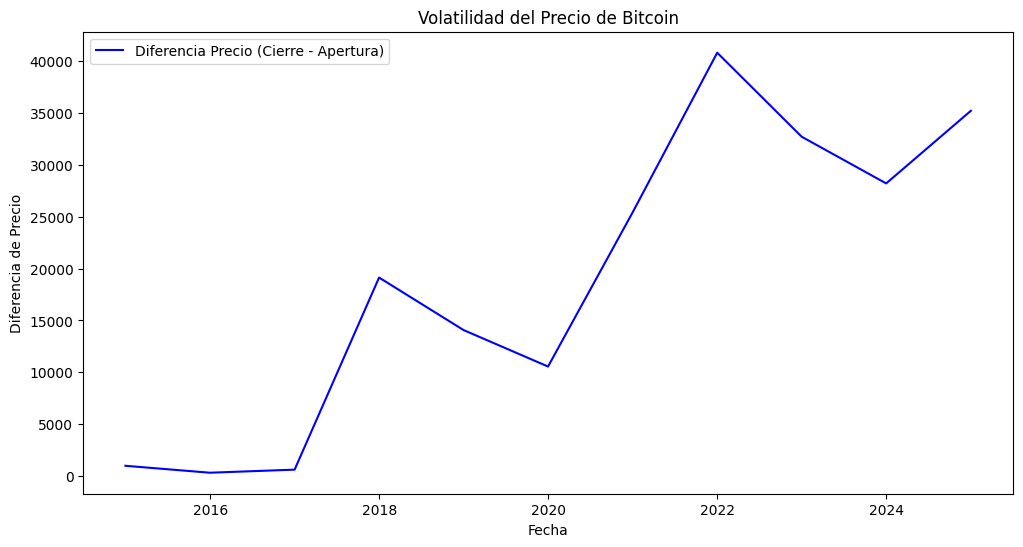

In [14]:
import matplotlib.pyplot as plt

# Calcular la diferencia entre el precio de cierre y el precio de apertura
btc_ano['Diferencia'] = btc_ano['Max'] - btc_ano['Low']

# Calcular la volatilidad como la desviación estándar de estas diferencias
volatilidad = np.std(btc_ano['Diferencia'])

# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar la volatilidad a lo largo del tiempo
plt.plot(btc_ano.index, btc_ano['Diferencia'], color='blue', label='Diferencia Precio (Cierre - Apertura)')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Precio')
plt.title('Volatilidad del Precio de Bitcoin')
plt.legend()

# Mostrar la gráfica
plt.show()


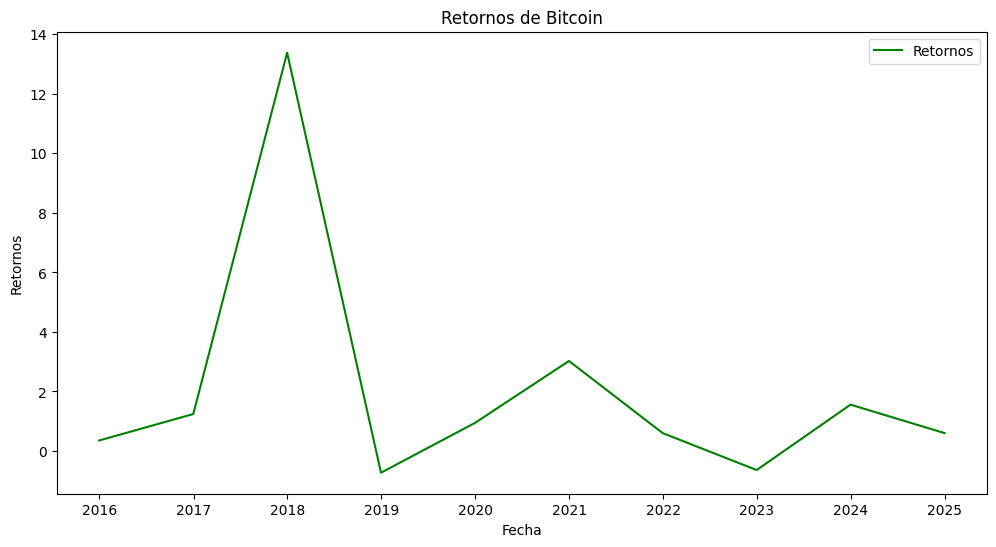

In [15]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar los retornos a lo largo del tiempo
plt.plot(btc_ano.index, btc_ano['retornos'], color='green', label='Retornos')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.title('Retornos de Bitcoin')
plt.legend()

# Mostrar la gráfica
plt.show()


In [16]:
retornos = btc_ano ['retornos']

In [17]:
retornos_anuales = retornos.sort_values (ascending= False).dropna()

retornos_anuales = pd.DataFrame (retornos_anuales)
retornos_anuales

,retornos
Date,
2017-12-31,13.382
2020-12-31,3.023
2023-12-31,1.556
2016-12-31,1.240
2019-12-31,0.940
2024-12-31,0.599
2021-12-31,0.597
2015-12-31,0.352
2022-12-31,-0.642


In [18]:
# Extraer el año del índice y los retornos
# Extraer el año del índice y los retornos
fec = [str(fecha.year) for fecha in retornos_anuales.index]
retornoko = retornos_anuales['retornos'].tolist()


print(retornoko)


[13.382, 3.023, 1.556, 1.24, 0.94, 0.599, 0.597, 0.352, -0.642, -0.732]


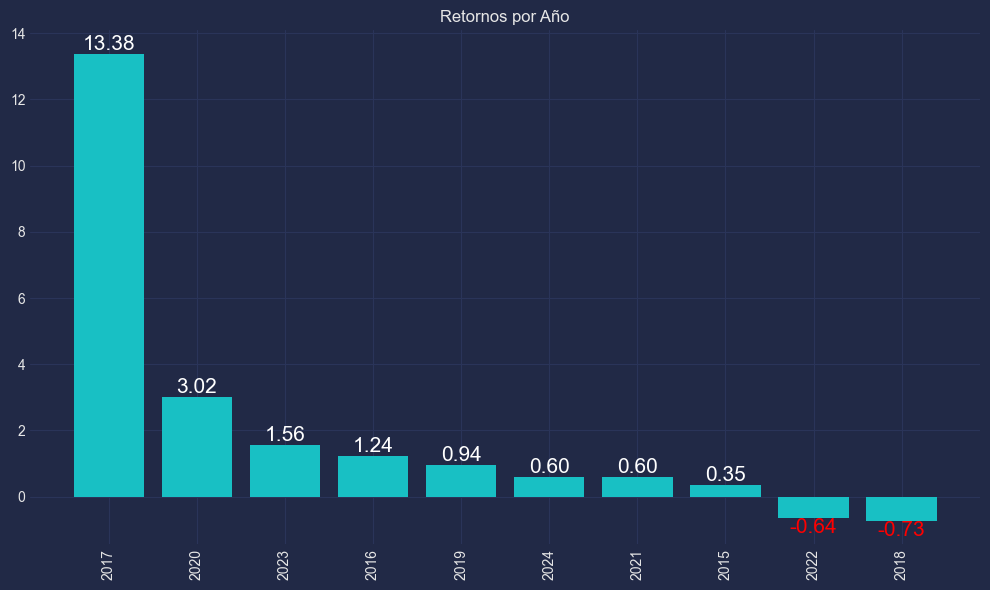

In [19]:
# Establecer el estilo de Matplotlib
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(fec, retornoko) #color='blue')

# Añadir los valores de retorno encima o debajo de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posición X
             height,                             # Posición Y
             f'{height:.2f}',                    # Valor a mostrar (formateado)
             ha='center',                        # Alineación horizontal
             va='bottom' if height > 0 else 'top',  # Alineación vertical
             fontsize=15,                         # Tamaño de la fuente
             color='white' if height > 0 else 'Red')  # Color del texto

# Configuración adicional del gráfico
#plt.xlabel('Fecha')
#plt.ylabel('Retornos')
plt.title('Retornos por Año')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [20]:
media_retornos = retornos_anuales['retornos'].mean().round (2)

print (media_retornos)

media_retornos_sin_2017 = retornos_anuales['retornos'].iloc [1:].mean().round (2)

print (media_retornos_sin_2017)


2.03
0.77
